# Assignment 2: Naive Bayes [20 marks]

Student Name: Hongbo Zhou   

Student ID: 1067814

## General info

<b>Due date</b>: Friday, 2 September 2022, 5pm

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: completed copy of this iPython notebook

<b>Late submissions</b>: -10% per day up to 5 days (both weekdays and weekends count)
<ul>
    <li>one day late, -2.0;</li>
    <li>two days late, -4.0;</li>
    <li>three days late, -6.0;</li>
    <li>four days late, -8.0;</li>
    <li>five days late, -10.0;</li>
</ul>

<b>Marks</b>: 20% of mark for class. 

<b>Materials</b>: See [Using Jupyter Notebook and Python page](https://canvas.lms.unimelb.edu.au/courses/126693/pages/python-and-jupyter-notebooks?module_item_id=3950453) on Canvas (under Modules> Coding Resources) for information on the basic setup required for this class, including an iPython notebook viewer.If your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  


<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should implement functions for the skeletons listed below. You may implement any number of additional (helper) functions. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 

You will be marked not only on the correctness of your methods, but also the quality and efficiency of your code: in particular, you should be careful to use Python built-in functions and operators when appropriate and pick descriptive variable names that adhere to <a href="https://www.python.org/dev/peps/pep-0008/">Python style requirements</a>. If you think it might be unclear what you are doing, you should comment your code to help the marker make sense of it. We reserve the right to deduct up to 4 marks for unreadable or excessively inefficient code.

7 of the marks available for this Project will be assigned to whether the five specified Python functions work in a manner consistent with the materials from COMP90049. Any other implementation will not be directly assessed (except insofar as it is required to make these five functions work correctly).

13 of the marks will be assigned to your responses to the questions, in terms of both accuracy and insightfulness. We will be looking for evidence that you have an implementation that allows you to explore the problem, but also that you have thought deeply about the data and the behaviour of the Naive Bayes classifier.

<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on the discussion board (Piazza -> Assignments -> A2); we recommend you check it regularly.

<b>Academic misconduct</b>: While you may discuss this homework in general terms with other students, it ultimately is still an individual task. Reuse of code or other instances of clear influence will be considered cheating. Please check the <a href="https://canvas.lms.unimelb.edu.au/courses/126693/modules#module_734188">CIS Academic Honesty training</a> for more information. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

**IMPORTANT**

Please carefully read and fill out the <b>Authorship Declaration</b> form at the bottom of the page. Failure to fill out this form results in the following deductions: 
<UL TYPE=”square”>
<LI>missing Authorship Declaration at the bottom of the page, -10.0
<LI>incomplete or unsigned Authorship Declaration at the bottom of the page, -5.0
</UL>

## Part 1: Base code [7 marks]

Instructions
1. Do **not** shuffle the data set
2. Treat the features as nominal and use them as provided (e.g., do **not** convert them to other feature types, such as numeric ones). Implement a Naive Bayes classifier with appropriate likelihood function for the data.
3. You should implement the Naive Bayes classifier from scratch. Do **not** use existing implementations/learning algorithms. You must use epsilon smoothing strategy as discussed in the Naive Bayes lecture. 
4. Apart from the instructions in point 3, you may use libraries to help you with data reading, representation, maths or evaluation.
5. Ensure that all and only required information is printed, as indicated in the final three code cells. Failure to adhere to print the required information will result in **[-1 mark]** per case. *(We don't mind details like you print a list or several numbers -- just make sure the information is displayed so that it's easily accessible)*
6. Please place the jupyter notebook into the same folder as the input data.


In [2]:
# Required packages
import pandas as pd
from math import log

In [3]:
# This function should open a csv file and read the data into a useable format [0.5 mark]



def preprocess(filename):
    data = pd.read_csv(filename)

    # Get rid of column ID
    data = data.drop("ID", axis=1)
    data_feature = data.drop("label", axis=1)
    data_label = data["label"]
    
    num_instances = data.shape[0]


    return data_feature, data_label, num_instances


In [4]:
# This function should build a supervised NB model [3 marks]
def train(train_feature, train_label, num_train):

    feature_names = train_feature.keys()
    label_values = train_label.unique()

    # Define epsilon based on number of instatnces
    eps = 1/num_train / 1000000

    # Count probability of each feature for each label
    Conditional_pro = {}
    Priori_pro = {}
    for label in label_values:
        Conditional_pro[label] = {}
        label_freq = len(train_label[train_label== label])
        total_num = len(train_feature)
        Priori_pro[label] = label_freq / total_num

        for feature in feature_names:
            Conditional_pro[label][feature] = {}
            feature_cats = train_feature[feature].unique()

            for cat in feature_cats:
                feature_freq = len(
                    train_feature[(train_feature[feature] == cat) & (train_label == label)])
                if feature_freq == 0:
                    Conditional_pro[label][feature][cat] = eps
                else:
                    Conditional_pro[label][feature][cat] = feature_freq / label_freq

    return Conditional_pro, Priori_pro


In [5]:
# This function should predict the class for a set of instances, based on a trained model [1.5 marks]


def predict(test_feature, test_label, Conditional_pro, Priori_pro, num_train):

    feature_names = test_feature.keys()
    label_values = Priori_pro.keys()

    eps = 1/num_train/1000000

    Prediction = []
    Result = []
    for index, row in test_feature.iterrows():
        Probability = {}
        for label in label_values:
            Probability[label] = log(Priori_pro[label])
            for feature in feature_names:
                if not Conditional_pro[label][feature].get(row[feature]):
                    Probability[label] += log(eps)
                else:
                    Probability[label] += log(Conditional_pro[label]
                                              [feature][row[feature]])

        Result.append(Probability)
        Prediction.append(max(Probability, key=Probability.get))

    return Result, Prediction


In [6]:
# This function should evaluate a set of predictions [1 mark]
def evaluate(test_label, Prediction, num_test):
    # Using weighted average Precision to evaluate
    
    label_values = test_label.unique()
    
    num_accurate = 0
        
    for i in range(num_test):
        for label in label_values:
            if Prediction[i] == label and test_label[i] == label:
                num_accurate += 1
                break
        
    accuracy = num_accurate / num_test  
    
    
    return accuracy, num_accurate

## Bank Marketing

In [7]:
# This cell should act as your "main" function where you call the above functions
# on the full Bank Marketing data set, and print the evaluation score. [0.33 marks]


# First, read in the data and apply your NB model to the Bank Marketing data
file_name = "bank-marketing.csv"
data_feature, data_label, num_instances = preprocess(file_name)

Conditional_pro, Priori_pro = train( data_feature, data_label, num_instances)
Result, Prediction = predict(
    data_feature, data_label, Conditional_pro, Priori_pro, num_instances)

# Second, print the full evaluation results from the evaluate() function
Bank_accuracy, _ = evaluate(data_label, Prediction, num_instances)
print("Accuracy is ", Bank_accuracy)

# Third, print data statistics and model predictions, as instructed below
# N is the total number of instances, F the total number of features, L the total number of labels
# The "class probabilities" may be unnormalized


print("F\neature vectors of instances [0, 1, 2]: ", data_feature.head(3))

print("\nNumber of instances (N): ", num_instances)
print("Number of features (F): ", data_feature.shape[1])
print("Number of labels (L): ", len(data_label.unique()))

print("\n\nPredicted class probabilities for instance N-3: ", Result[-3])
print("Predicted class for instance N-3: ", Prediction[-3])
print("\nPredicted class probabilities for instance N-2: ", Result[-2])
print("Predicted class for instance N-2: ", Prediction[-2])
print("\nPredicted class probabilities for instance N-1: ", Result[-1])
print("Predicted class for instance N-1: ", Prediction[-1])


Accuracy is  0.8874142888741429
F
eature vectors of instances [0, 1, 2]:            job  marital  education default housing loan   contact month  \
0  unemployed  married    primary      no      no   no  cellular   oct   
1    services  married  secondary      no     yes  yes  cellular   may   
2  management   single   tertiary      no     yes   no  cellular   apr   

  poutcome  
0  unknown  
1  failure  
2  failure  

Number of instances (N):  4521
Number of features (F):  9
Number of labels (L):  2


Predicted class probabilities for instance N-3:  {'no': -6.711607763537066, 'yes': -8.58311083143239}
Predicted class for instance N-3:  no

Predicted class probabilities for instance N-2:  {'no': -10.619918711707392, 'yes': -11.68220339799834}
Predicted class for instance N-2:  no

Predicted class probabilities for instance N-1:  {'no': -14.88701380580801, 'yes': -16.28697922108946}
Predicted class for instance N-1:  no


## Student

In [8]:
# This cell should act as your "main" function where you call the above functions
# on the full Student data set, and print the evaluation score. [0.33 marks]


# First, read in the data and apply your NB model to the Student data
file_name = "student.csv"
data_feature, data_label, num_instances = preprocess(file_name)

Conditional_pro, Priori_pro = train(data_feature, data_label, num_instances)
Result, Prediction = predict(
    data_feature, data_label, Conditional_pro, Priori_pro, num_instances)

# Second, print the full evaluation results from the evaluate() function
Student_accuracy, _ = evaluate(data_label, Prediction, num_instances)
print("Accuracy is ", Student_accuracy)


# Third, print data statistics and model predictions, as instructed below
# N is the total number of instances, F the total number of features, L the total number of labels
# The "class probabilities" may be unnormalized


print("\nFeature vectors of instances [0, 1, 2]: \n", data_feature.head(3))

print("\nNumber of instances (N): ", num_instances)
print("Number of features (F): ", data_feature.shape[1])
print("Number of labels (L): ", len(data_label.unique()))

print("\n\nPredicted class probabilities for instance N-3: ", Result[-3])
print("Predicted class for instance N-3: ", Prediction[-3])
print("\nPredicted class probabilities for instance N-2: ", Result[-2])
print("Predicted class for instance N-2: ", Prediction[-2])
print("\nPredicted class probabilities for instance N-1: ", Result[-1])
print("Predicted class for instance N-1: ", Prediction[-1])


Accuracy is  0.48382126348228044

Feature vectors of instances [0, 1, 2]: 
   school sex address famsize Pstatus  Medu  Fedu     Mjob     Fjob  reason  \
0     GP   F       U     GT3       A  high  high  at_home  teacher  course   
1     GP   F       U     GT3       T   low   low  at_home    other  course   
2     GP   F       U     LE3       T   low   low  at_home    other   other   

   ... higher internet romantic     famrel  freetime     goout      Dalc  \
0  ...    yes       no       no       good  mediocre      good  very_bad   
1  ...    yes      yes       no  excellent  mediocre  mediocre  very_bad   
2  ...    yes      yes       no       good  mediocre       bad       bad   

       Walc    health      absences  
0  very_bad  mediocre   four_to_six  
1  very_bad  mediocre  one_to_three  
2  mediocre  mediocre   four_to_six  

[3 rows x 29 columns]

Number of instances (N):  649
Number of features (F):  29
Number of labels (L):  6


Predicted class probabilities for instance N-

## Obesity

In [9]:

# This cell should act as your "main" function where you call the above functions
# on the full Obesity data set, and print the evaluation score. [0.33 marks]


# First, read in the data and apply your NB model to the Obesity data
file_name = "obesity.csv"
data_feature, data_label, num_instances = preprocess(file_name)

Conditional_pro, Priori_pro = train(data_feature, data_label, num_instances)
Result, Prediction = predict(
    data_feature, data_label, Conditional_pro, Priori_pro, num_instances)

# Second, print the full evaluation results from the evaluate() function
Obesity_accuracy, _ = evaluate(data_label, Prediction, num_instances)
print("Accuracy is ", Obesity_accuracy)


# Third, print data statistics and model predictions, as instructed below
# N is the total number of instances, F the total number of features, L the total number of labels
# The "class probabilities" may be unnormalized


print("\nFeature vectors of instances [0, 1, 2]: \n", data_feature.head(3))

print("\nNumber of instances (N): ", num_instances)
print("Number of features (F): ", data_feature.shape[1])
print("Number of labels (L): ", len(data_label.unique()))

print("\n\nPredicted class probabilities for instance N-3: ", Result[-3])
print("Predicted class for instance N-3: ", Prediction[-3])
print("\nPredicted class probabilities for instance N-2: ", Result[-2])
print("Predicted class for instance N-2: ", Prediction[-2])
print("\nPredicted class probabilities for instance N-1: ", Result[-1])
print("Predicted class for instance N-1: ", Prediction[-1])


Accuracy is  0.7783041212695405

Feature vectors of instances [0, 1, 2]: 
   Gender family_history_with_overweight FAVC  FCVC   NCP       CAEC SMOKE  \
0   Male                            yes  yes   mid  high  Sometimes   yes   
1   Male                            yes  yes   mid  high  Sometimes    no   
2   Male                            yes  yes  high  high  Sometimes    no   

   CH2O SCC           FAF       TUE        CALC                 MTRANS  
0   mid  no  low-activity  mediocre  Frequently  Public_Transportation  
1  high  no  low-activity      good   Sometimes  Public_Transportation  
2  high  no  low-activity      good   Sometimes  Public_Transportation  

Number of instances (N):  2111
Number of features (F):  13
Number of labels (L):  2


Predicted class probabilities for instance N-3:  {'not-obese': -11.010971850189438, 'obese': -16.78139621234939}
Predicted class for instance N-3:  not-obese

Predicted class probabilities for instance N-2:  {'not-obese': -10.29921174389

#### Part 2: Conceptual questions [13 marks]

## Question 1: One-R Baseline [3 marks]

In [10]:
# Write additional code here, if necessary (you may insert additional code cells)
# You should implement the One-R classifier from scratch. Do not use existing implementations/learning algorithms.
# Print the feature name and its corresponding error rate that One-R selects, in addition to any evaluation scores.



def One_R(file_name):
    data_feature, data_label, num_instances = preprocess(file_name)
    feature_names = data_feature.keys()
    label_names = data_label.unique()

    Error_rate = {}
    for feature in feature_names:
        feature_cats = data_feature[feature].unique()
        
        total_err = 0
        for cat in feature_cats:
            num_cat = len(data_feature[(data_feature[feature] == cat)])
            label_freq = {}
            
            for label in label_names:
                freq = len(data_feature[(data_feature[feature] == cat) & (data_label == label)])
                
                label_freq[label] = freq
            
            
            pre_label = max(label_freq, key=label_freq.get)
            total_err += num_cat-label_freq[pre_label]
        
        Error_rate[feature] = total_err/num_instances

    selected_feature = min(Error_rate, key=Error_rate.get)
    error = Error_rate[selected_feature]

    print("Selected feature name: ", selected_feature)
    print("Corresponding error rate: ", error)
    print("Corresponding accurate rate (1-e): ", 1-error)

    return


In [11]:
print("Data set: Student")
print("Accuracy of Naive Bayes: ", Student_accuracy)
One_R("student.csv")

print("\nData set: Obesity")
print("Accuracy of Naive Bayes: ", Obesity_accuracy)
One_R("obesity.csv")


Data set: Student
Accuracy of Naive Bayes:  0.48382126348228044
Selected feature name:  Fedu
Corresponding error rate:  0.6656394453004623
Corresponding accurate rate (1-e):  0.33436055469953774

Data set: Obesity
Accuracy of Naive Bayes:  0.7783041212695405
Selected feature name:  family_history_with_overweight
Corresponding error rate:  0.36475603979156795
Corresponding accurate rate (1-e):  0.6352439602084321


### Provide your text answer to **Question 1.b** of 100-150 words in this cell.

For both chosen dataset, "Student" and "Obesity", the Naive Bayes classifier performances better than the One-R baseline comparing weighted average recall. However, there are a few things to notice. 

First, the error rate "Student" is very high. One possible reason is that there are 6 labels in "Student", but One-R is actually a "one vs all" mothod. That means even though the labed is assigned to be the one with highest frequency, the proportion of that label is relatively low assuming there is no dominant label.  But for binay labeled datasets, like "Obesity", the error rate is much smaller. Another possible reason is that all features in "Student" are not strongly correlation with labels. That means it is unlikely to correctly predict based on one given feature. However, the higher weighted average recall shows that adding some features does help to improve the prediction.

Second, comparing with two datasets, the accuracy of Naive Byes for "Student" is much worse than the accuracy for "Obesity". This may be because there are too many features in "Student", which decreases the performance of Naive Bayes model due to the naive assumption. In other words, the Naive Bayes model is so simple that causes underfitting.



## Question 2: Evaluation strategy [3 marks] 


In [12]:
# Write additional code here, if necessary (you may insert additional code cells)

def cross_validation(data_feature, data_label, num_instances):
    

    # Using 10-fold CV
    N = 10
    num_per_fold = round(num_instances / N)
    total_accurate = 0

    for i in range(N):
        if i == N-1:
            test_start = i*num_per_fold
            test_end = num_instances
            num_test = num_instances - i*num_per_fold

        else:
            test_start = i*num_per_fold
            test_end = (i+1)*num_per_fold
            num_test = num_per_fold

        num_train = num_instances - num_test

        test_feature = data_feature.iloc[test_start: test_end].reset_index(
            drop=True)
        test_label = data_label.iloc[test_start: test_end].reset_index(
            drop=True)

        train_feature1 = data_feature.iloc[0:test_start]
        train_feature2 = data_feature.iloc[test_end: num_instances]
        train_feature = pd.concat(
            [train_feature1, train_feature2]).reset_index(drop=True)

        train_label1 = data_label.iloc[0:test_start]
        train_label2 = data_label.iloc[test_end: num_instances]
        train_label = pd.concat(
            [train_label1, train_label2]).reset_index(drop=True)

        Conditional_pro, Priori_pro = train(
            train_feature, train_label, num_train)

        Result, Prediction = predict(
            test_feature, test_label, Conditional_pro, Priori_pro, num_train)

        
        _, num_accuract = evaluate(test_label, Prediction, num_test)

        total_accurate += num_accuract

    # Accumulate accuracy
    accuracy = total_accurate / num_instances


    return accuracy


In [13]:
data_feature, data_label, num_instances = preprocess("bank-marketing.csv")
Bank_cv_accuracy = cross_validation(data_feature, data_label, num_instances)
print("Data set: Bank-marketing")
print("Accuracy using whole data set: ", Bank_accuracy)
print("Accuracy using cross-validation: ", Bank_cv_accuracy)

data_feature, data_label, num_instances = preprocess("obesity.csv")
Obesity_cv_accuracy = cross_validation(data_feature, data_label, num_instances)
print("\nData set: Obesity")
print("Accuracy using whole data set: ", Obesity_accuracy)
print("Accuracy using cross-validation: ", Obesity_cv_accuracy)


Data set: Bank-marketing
Accuracy using whole data set:  0.8874142888741429
Accuracy using cross-validation:  0.8863083388630834

Data set: Obesity
Accuracy using whole data set:  0.7783041212695405
Accuracy using cross-validation:  0.777830412126954


### Provide your text answer to **Question 2** 100-150 words in this cell.

The accuracy using whole data set is a little bit higher than the accruacy using cross-validation for both dataset, "Bank marketing" and "Obesity". But the difference is only about 0.1%, which is not too much but reasonable.

There are two aspects to disscuss. The first one is why evaluating using whole data set performences better. This is because the distribution of the training set is exactly the same as the distribution of the testing set. All situations in testing set have been trained and optimaised before. This high accuracy is actually meaningless because the generalization capability of the model is not tested. The second one is how the result using cross-validation is so good that there is only 0.1% difference. This is because the accuracy is accumulated through all iterations, such that the model has been trained using all information of the dataset, however, avoided the problems discussed before. 



## Question 3: Feature Selection and Naive Bayes Assumptions [3 marks]

In [14]:
# Write additional code here, if necessary (you may insert additional code cells)

from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt





def plt_heatmap(df, name):
    feature_names = df.keys()
    cols = rows = feature_names.to_list()

    scores = []
    for row in rows:
        score = []
        for col in cols:
            if row == col:
                score.append(None)
            else:
                score.append(round(metrics.mutual_info_score(df[col], df[row]),5))
        scores.append(score)

    df = pd.DataFrame(scores,index = rows, columns= cols)
    plt.figure(dpi=120)
    sns.heatmap(data = df, vmax=0.1, cmap=sns.diverging_palette(10, 220, sep=80, n=20))
    plt.title(name)
    


In [15]:
def Ablation(file_name):
    data_feature, data_label, num_instances = preprocess(file_name)
    base_accuracy = cross_validation(data_feature,data_label,num_instances)

    drop =[]
    for feature in data_feature.keys():
        test_data = data_feature.drop(feature,axis=1)
        test_accuracy = cross_validation(test_data,data_label,num_instances)
        if test_accuracy > base_accuracy:
            data_feature = test_data
            base_accuracy = test_accuracy
            drop.append(feature)

    return base_accuracy, drop

In [16]:
file_name = "obesity.csv"
accuracy, obesity_drop = Ablation(file_name)
print("Imporved accuracy using CV of Obesity is: ", accuracy)
print("Deleted features are: ",obesity_drop)

file_name = "bank-marketing.csv"
accuracy, bank_drop = Ablation(file_name)
print("Imporved accuracy using CV of Bank-marketing is: ", accuracy)
print("Deleted features are: ",bank_drop)

Imporved accuracy using CV of Obesity is:  0.7915679772619612
Deleted features are:  ['Gender', 'FCVC', 'TUE', 'CALC']
Imporved accuracy using CV of Bank-marketing is:  0.8933864189338642
Deleted features are:  ['job', 'loan', 'month']


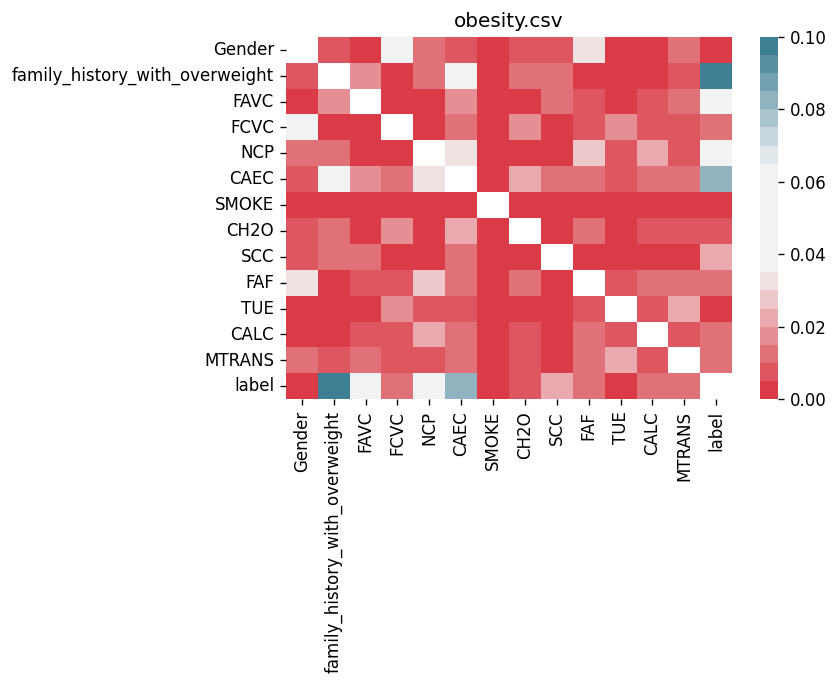

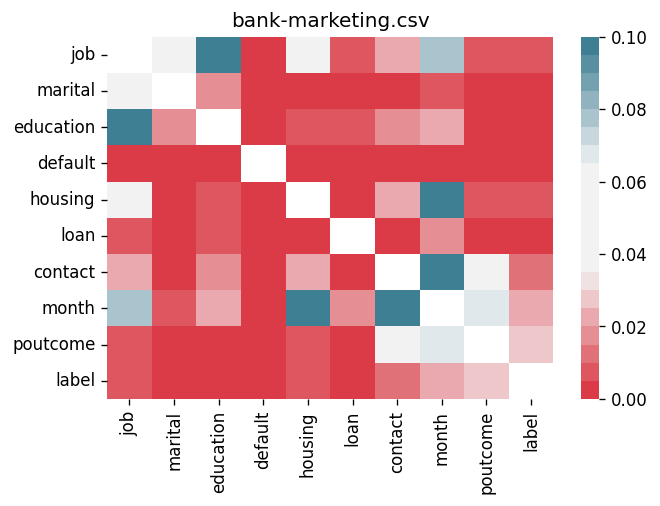

In [17]:
files = ['obesity.csv','bank-marketing.csv']
for file_name in files:
    df = pd.read_csv(file_name).drop('ID', axis=1)
    plt_heatmap(df, file_name)



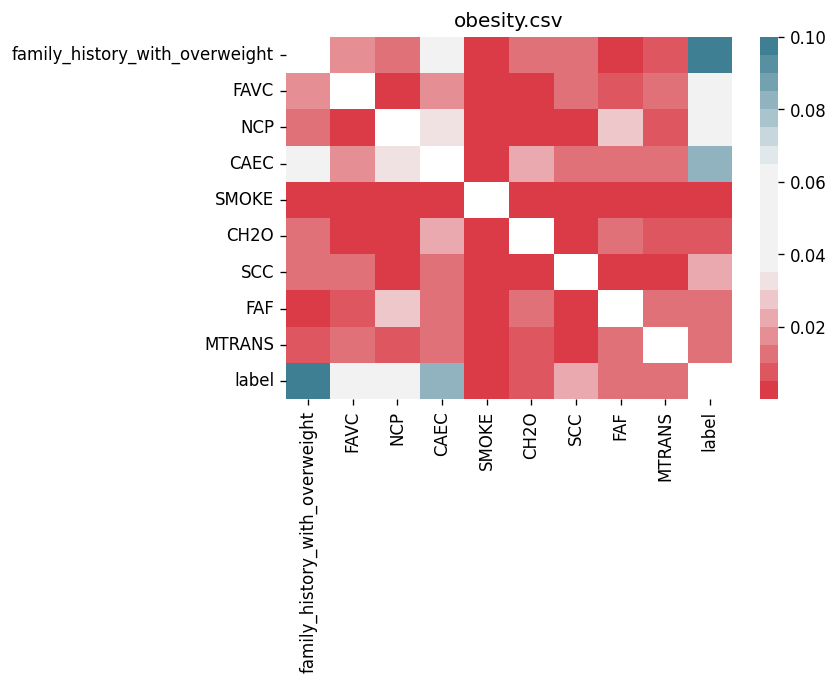

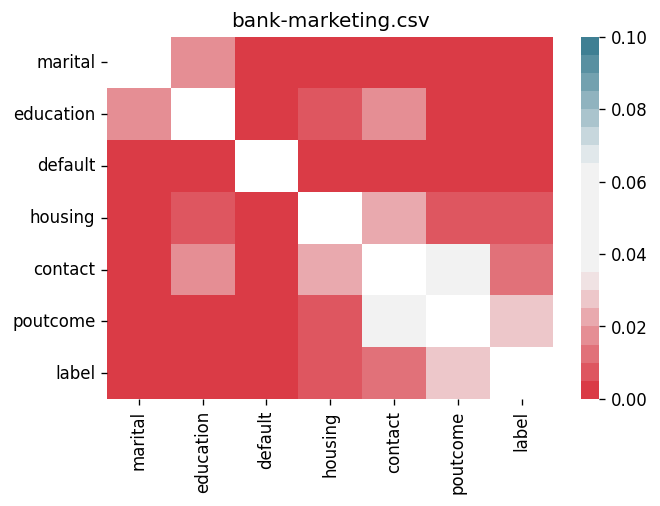

In [18]:
file_name = 'obesity.csv'
df = pd.read_csv(file_name).drop(
    'ID', axis=1).drop(obesity_drop, axis=1)

plt_heatmap(df, file_name)


file_name = 'bank-marketing.csv'
df = pd.read_csv(file_name).drop('ID',
                                 axis=1).drop(bank_drop, axis=1)
plt_heatmap(df, file_name)


### Provide your text answer to **Question 3.a** of 100-150 words in this cell.

The first pair of heat plots shows the original mutual information of features, including label. It clearly shows that some features are relatively hightly correlated to label, such as "Family history", "FAVC", "CAEC" in Obesity, and somre features are not correlated to label but dependent to each other, such as "Job" and "month" in Bank-marketing. 

To improve the Naive Bayse model based on assumptions, features should be hightly correlated with lebal but independet with other features. Using Ablation approach, ['Gender', 'FCVC', 'TUE', 'CALC'] are deleted from Obesity and ['job', 'loan', 'month'] are deleted from Bank-marketing. Accuracy is increased by 1 to 2 percent respectively. This generally follows the assumption that dependent features that are not correlated to label shoud be removed. Mutual information differences can be seen from the second pairs of heat plots.

### Provide your text answer to **Question 3.b** of 100-150 words in this cell.

Assumptions: 
1. Features of an instance are conditionally independent given the class
2. Instances are independent of each other
3. The distribution of data in the training instances is the same as the distribution of data in the test instances

Reason:
If the first assumption are violated, the naive assumption that P(x1,x2,...,xn| Y ) = P(Y)*Product(P(xi|Y))) will not hold. This can be problematic to find out all possible combination of features given Y with large features. Like case Student, that has 29 features, 6 labels and each feature has more than 2 categories, the training set will be very huge to cover all possibilities to not violate the assumption 3. Another problem is that using dependent features will amplify the impact of certain information since same piece of information is used multiple times, such as "Job" and "Education" in Banking-marketing. 

Assumption 2 and 3 guarantees that the model is not biased. If the distribution is not the same, the model will face some uncovered situations, which will eventually lead to poor performance. Dealing with unseens situations needs extra stratigies, such as smoothing. This problem happens when traing for Obesity using cross-validation. Just using smoothing will not correctly represent the true likelyhood of the unseen feature or label. If assumption 2 violates, even if training set is big, the model still does not have the ability to generalize. In addition, dependent instances will cause the model to overfit as the same as conditionally independent.


## Question 4: Feature Selection and Ethics [4 marks]

In [19]:
# Write additional code here, if necessary (you may insert additional code cells)

file_name = 'student.csv'

data_feature, data_label, num_instances = preprocess(file_name)

original_accuracy = cross_validation(data_feature, data_label, num_instances)

drop = ['sex','address','Pstatus','Medu','Fedu','Mjob','Fjob',]

new_feature = data_feature.drop(drop, axis=1)
new_accuracy = cross_validation(new_feature, data_label, num_instances)

print("Origianl accuracy: ", original_accuracy)
print("New accuracy: ", new_accuracy)

Origianl accuracy:  0.3574730354391371
New accuracy:  0.33436055469953774


### Provide your text answer to **Question 4.a** of 100-150 words in this cell.

The Student data set  provides information not only about personal behavior, like "goout" and "health", but also about their family background like "fedu" and "Pstatus". These background information may truely help model to predict the grade of that student. However, it may cause a problem that students with "better" family background, such as parents have high education, will always be prediected with higher grades. In this case, students with low parents' educational backgrounds are more likely to be rejected than students with high educational backgrounds.  Same problem may arise due to other features, like parent's job (Occupational Discrimination), home address (Regional Discrimination). 



### Provide your text answer to **Question 4.b** of 100-150 words in this cell.

After removimg ethically problematic features ('sex','address','Pstatus','Medu','Fedu','Mjob','Fjob'), the accuracy decreases about 2%. This is reasonable becuase some features may be highly correlated with labels which helps model to predict. Losing those information will definitely degrade the performance of the model.



### Provide your text answer to **Question 4.c** of 100-150 words in this cell.

It's not enough. It is necessary to ensure that the training set is not biased. If the training instances are select in a specific way, ethical problems may also arise. For example, only students who are female with low grade or male with high grade are selected into the training set. It is clearly that male students are more likely to be predicted with high grade in testing set, based on the assumption that distribution of training is the same as the distribution of testing. In this case, strong correlations between feature and label are artificially made.



<b>Authorship Declaration</b>:

   (1) I certify that the program contained in this submission is completely
   my own individual work, except where explicitly noted by comments that
   provide details otherwise.  I understand that work that has been developed
   by another student, or by me in collaboration with other students,
   or by non-students as a result of request, solicitation, or payment,
   may not be submitted for assessment in this subject.  I understand that
   submitting for assessment work developed by or in collaboration with
   other students or non-students constitutes Academic Misconduct, and
   may be penalized by mark deductions, or by other penalties determined
   via the University of Melbourne Academic Honesty Policy, as described
   at https://academicintegrity.unimelb.edu.au.

   (2) I also certify that I have not provided a copy of this work in either
   softcopy or hardcopy or any other form to any other student, and nor will
   I do so until after the marks are released. I understand that providing
   my work to other students, regardless of my intention or any undertakings
   made to me by that other student, is also Academic Misconduct.

   (3) I further understand that providing a copy of the assignment
   specification to any form of code authoring or assignment tutoring
   service, or drawing the attention of others to such services and code
   that may have been made available via such a service, may be regarded
   as Student General Misconduct (interfering with the teaching activities
   of the University and/or inciting others to commit Academic Misconduct).
   I understand that an allegation of Student General Misconduct may arise
   regardless of whether or not I personally make use of such solutions
   or sought benefit from such actions.

   <b>Signed by</b>: Hongbo Zhou 1067814
   
   <b>Dated</b>: 2022-8-30